<a href="https://colab.research.google.com/github/GeorgeSakketos/Data_Mining_Exercice_01/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Τεχνικές Εξόρυξης Δεδομένων**
## Εργασία 1
Σακκέτος Γεώργιος - 1115202000177

Γαλανός Αλέξανδρος - 1115201900032

# Connect to Google Drive

In [164]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Μέρος 1**




Import Libraries and create file path shortcut

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fol
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from geopy.distance import geodesic
from nltk.corpus import words
from nltk.corpus import stopwords
import seaborn as sns
import nltk
import re
import ast
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

filePath = '/content/gdrive/My Drive/Data_Mining_CSV/2023/'
nltk.download('words')

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Pandas version 2.0.3


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

June


In [166]:
#Read June CSV
filePath_june = filePath + 'june/'
june_listings_2023 = pd.read_csv(filePath_june + 'listings.csv', thousands = ',')

# Keep the Columns we want
june_listings_2023 = june_listings_2023[['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                         'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price',
                         'availability_365', 'minimum_nights']]

june_listings_2023.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

# Add Month Column
june_listings_2023['month'] = 'june'

March


In [167]:
# Read March CSV
filePath_march = filePath + 'march/'
march_listings_2023 = pd.read_csv(filePath_march + 'listings.csv', thousands = ',')

# Keep the Columns we want
march_listings_2023 = march_listings_2023[['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                         'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price',
                         'availability_365', 'minimum_nights']]

march_listings_2023.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

# Add Month Column
march_listings_2023['month'] = 'march'

September


In [168]:
# Read September CSV
filePath_september = filePath + 'september/'
september_listings_2023 = pd.read_csv(filePath_september + 'listings.csv', thousands = ',')

# Keep the Columns we want
september_listings_2023 = september_listings_2023[['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                         'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price',
                         'availability_365', 'minimum_nights']]

september_listings_2023.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

# Add Month Column
september_listings_2023['month'] = 'september'

Combine Dataframes

In [169]:
dfs = [june_listings_2023, march_listings_2023, september_listings_2023]

# Combine June, March and September into one Dataframe
final_df_2023 = pd.concat(dfs, ignore_index = True)

# Reset Index
final_df_2023 = final_df_2023.reset_index(drop=True)

Change 'host_has_profile' and 'host_identity_verified' depending there state. If a profile picture exists and the host is verified (not NaN) then change columns to True.

In [170]:
convertColumns = ['host_has_profile_pic', 'host_identity_verified']
for col in convertColumns:
  final_df_2023[col] = final_df_2023[col].notna()

Change 'instant_bookable' from 't' and 'f' to True and False.

In [171]:
final_df_2023.loc[final_df_2023['instant_bookable'] == 't', 'instant_bookable'] = True
final_df_2023.loc[final_df_2023['instant_bookable'] == 'f', 'instant_bookable'] = False

Correct NaN values on 'bathrooms' and convert them to 0 if NaN.

In [172]:
final_df_2023['bathrooms'] = final_df_2023['bathrooms'].fillna(0)

Drop rows with missing data (NaN) and check for extremes on 'price' and 'accommodates'.

In [173]:
# Drop NaN
final_df_2023 = final_df_2023.dropna()

# Use Gaussian Distributions to Find Extremes and Remove Theme
final_df_2023_copy = final_df_2023.copy()
final_df_2023_copy['price'] = final_df_2023_copy['price'].str.replace('$', '').str.replace(',', '')
final_df_2023_copy['price'] = final_df_2023_copy['price'].astype(float)

final_df_2023_copy['outlier_price'] = abs(final_df_2023_copy['price'] - final_df_2023_copy['price'].mean()) > 1.96*final_df_2023_copy['price'].std()
final_df_2023_copy['outlier_accommodates'] = abs(final_df_2023_copy['accommodates'] - final_df_2023_copy['accommodates'].mean()) > 1.96*final_df_2023_copy['accommodates'].std()

final_df_2023 = final_df_2023_copy[~final_df_2023_copy['outlier_price']]
final_df_2023 = final_df_2023_copy[~final_df_2023_copy['outlier_accommodates']]

final_df_2023 = final_df_2023.drop('outlier_price', axis=1)
final_df_2023 = final_df_2023.drop('outlier_accommodates', axis=1)

Display Final Dataframe

In [174]:
pd.set_option('display.max_columns', None)
final_df_2023.head()

,id,bedrooms,beds,review_scores_rating,number_of_reviews,neighbourhood,name,latitude,longitude,last_review,instant_bookable,host_since,host_response_rate,host_identity_verified,host_has_profile_pic,first_review,description,bathrooms,accommodates,amenities,room_type,property_type,price,availability_365,minimum_nights,month
1,10990,1.0,1.0,4.80,65,ΑΜΠΕΛΟΚΗΠΟΙ,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37.989030,23.764480,2023-04-04,True,2009-09-08,100%,True,True,2012-09-06,Athens Quality Apartments - Deluxe apartment i...,0.0,4,"[""Coffee maker"", ""Hot water"", ""Bed linens"", ""E...",Entire home/apt,Entire rental unit,70.0,163,1,june
3,10995,1.0,2.0,4.80,30,ΑΜΠΕΛΟΚΗΠΟΙ,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37.989030,23.764480,2023-06-02,True,2009-09-08,100%,True,True,2010-07-08,"AQA No2 is 1-bedroom apartment (47m2), on the ...",0.0,4,"[""Coffee maker"", ""Hot water"", ""Bed linens"", ""E...",Entire home/apt,Entire rental unit,77.0,167,1,june
4,695173,2.0,3.0,4.88,233,ΝΕΟΣ ΚΟΣΜΟΣ,Condo in Athens · ★4.88 · 2 bedrooms · 3 beds ...,37.963410,23.728750,2023-03-08,True,2012-09-13,100%,True,True,2014-04-25,My unique artistic comfortable two bedroom apa...,0.0,5,"[""Coffee maker"", ""Hot water"", ""Dedicated works...",Entire home/apt,Entire condo,115.0,245,5,june
5,27262,1.0,1.0,4.81,21,ΑΜΠΕΛΟΚΗΠΟΙ,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37.989240,23.765000,2023-06-02,True,2009-09-08,100%,True,True,2012-09-21,Athens Quality Apartments - Ground floor apar...,0.0,2,"[""Fast wifi \u2013 50 Mbps"", ""Coffee maker"", ""...",Entire home/apt,Entire rental unit,100.0,176,1,june
6,28186,1.0,2.0,4.82,490,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Loft in Athens · ★4.82 · 1 bedroom · 2 beds · ...,37.976334,23.729834,2023-05-17,True,2010-05-09,100%,True,True,2012-05-21,TOP 5 REASONS to stay here<br />⭐️Don't waste ...,0.0,4,"[""Coffee maker"", ""Hot water"", ""Books and readi...",Entire home/apt,Entire loft,91.0,340,2,june


Export Final Dataframe as CSV

In [175]:
final_df_2023.to_csv('/content/gdrive/My Drive/Data_Mining_CSV/2023/train_2023.csv', index = False)

Open Train 2023

In [176]:
train_2023 = pd.read_csv(filePath + 'train_2023.csv')


Ερώτημα 1.1

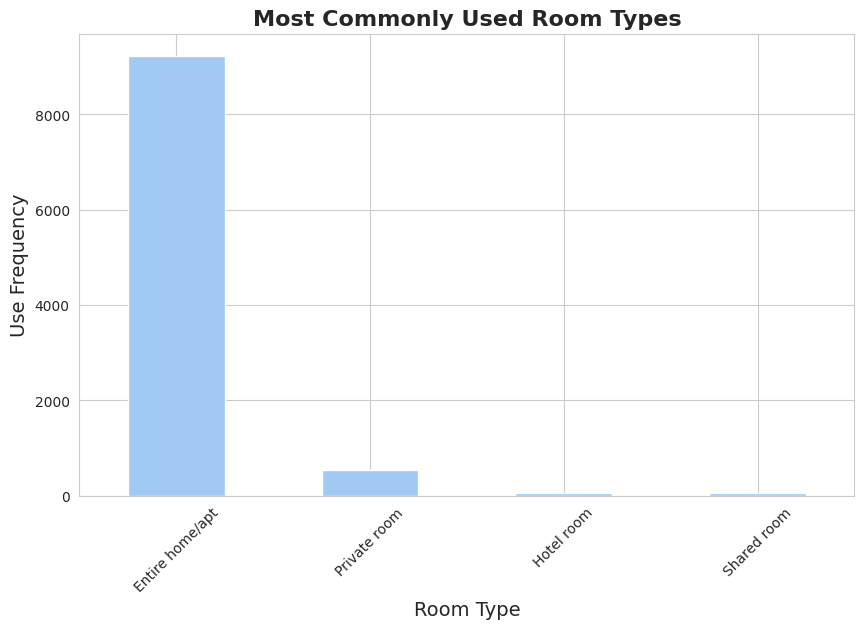

In [177]:
train_2023_copy = train_2023.copy()

# Remove Duplicates IDs
train_2023_no_dup = train_2023_copy.drop_duplicates(subset = 'id')

# Count Room Types and Sort in Desc Order
room_type_count = train_2023_no_dup['room_type'].value_counts().sort_values(ascending=False)

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create Plot for Most Common Room Types
room_type_count.plot(kind='bar', figsize=(10, 6))

# Title and Labels
plt.title("Most Commonly Used Room Types", fontsize=16, fontweight='bold')
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("Use Frequency", fontsize=14)

# Rotate x-axis label
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.2

month
june         101.145285
march         82.946441
september    101.308044
Name: price, dtype: float64


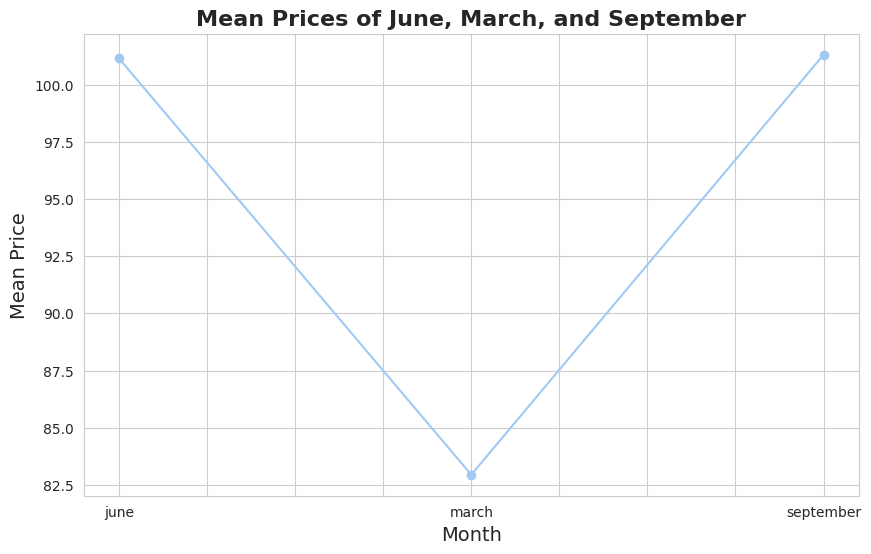

In [178]:
train_2023_copy = train_2023.copy()

# Find Mean Value
train_2023_mean = train_2023_copy.groupby('month')['price'].mean()

print(train_2023_mean)

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create Plot for Mean Prices of June, March and September
train_2023_mean.plot(kind='line', marker='o', figsize=(10, 6))

# Title and Labels
plt.title("Mean Prices of June, March, and September", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Mean Price", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.3

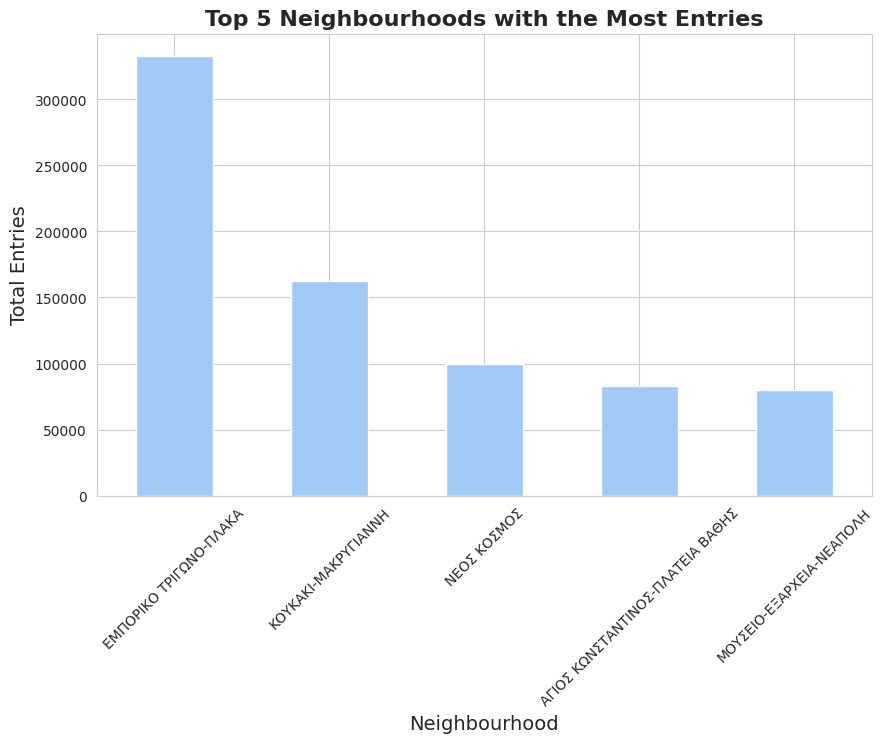

In [179]:
# Apply unidecode to the 'neighbourhood' column
train_2023_copy = train_2023.copy()

# Group by 'neighbourhood' and sum up 'number_of_reviews', then select the top 5
top_5 = train_2023_copy.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(5)

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot Top 5 Neighbourhoods
top_5.plot(kind='bar', figsize=(10, 6))

# Title and Labels
plt.xticks(rotation=45)
plt.title("Top 5 Neighbourhoods with the Most Entries", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Total Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.4

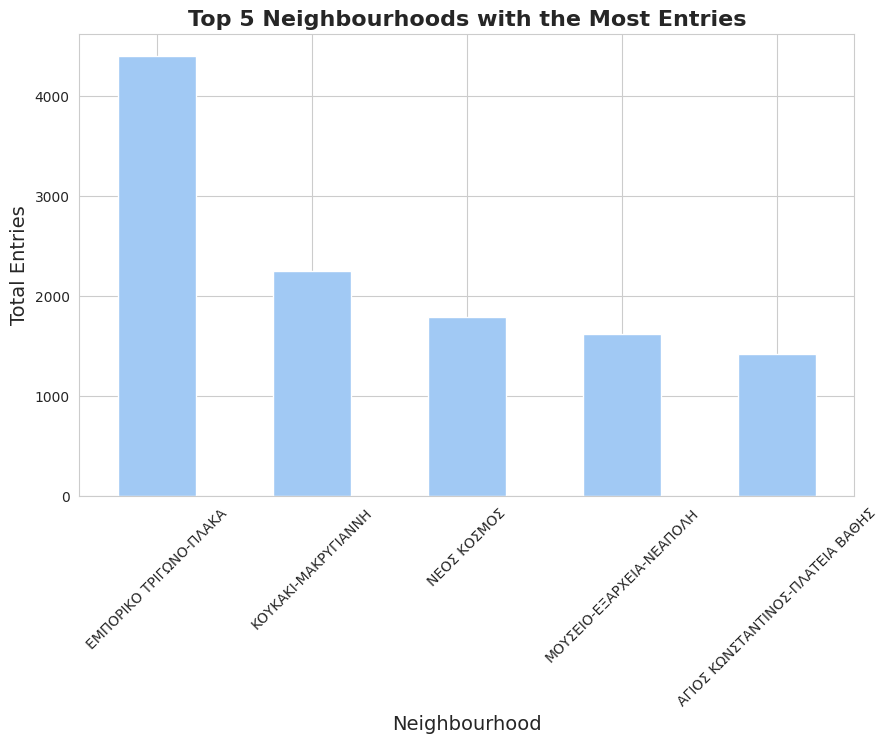

In [180]:
train_2023_copy = train_2023.copy()

# Group by Neighbourhood and count the number of reviews
number_of_entries = train_2023_copy.groupby(train_2023['neighbourhood']).size()

# Sort by number of reviews and keep the top 5
top_neighbourhoods = number_of_entries.nlargest(5)

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot Top 5 Neighbourhoods
top_neighbourhoods.plot(kind='bar', figsize = (10, 6))

# Title and Labels
plt.xticks(rotation=45)
plt.title("Top 5 Neighbourhoods with the Most Entries", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Total Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.5

In [181]:
train_2023_copy = train_2023.copy()
neighbourhood_per_month = train_2023_copy.groupby(['neighbourhood', 'month']).size()

print(neighbourhood_per_month)

neighbourhood     month    
1Ο ΝΕΚΡΟΤΑΦΕΙΟ    june          26
                  march         30
                  september     36
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ  june          19
                  march         22
                              ... 
ΣΤΑΔΙΟ            march        139
                  september    161
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ   june          53
                  march         57
                  september     55
Length: 132, dtype: int64


Ερώτημα 1.6

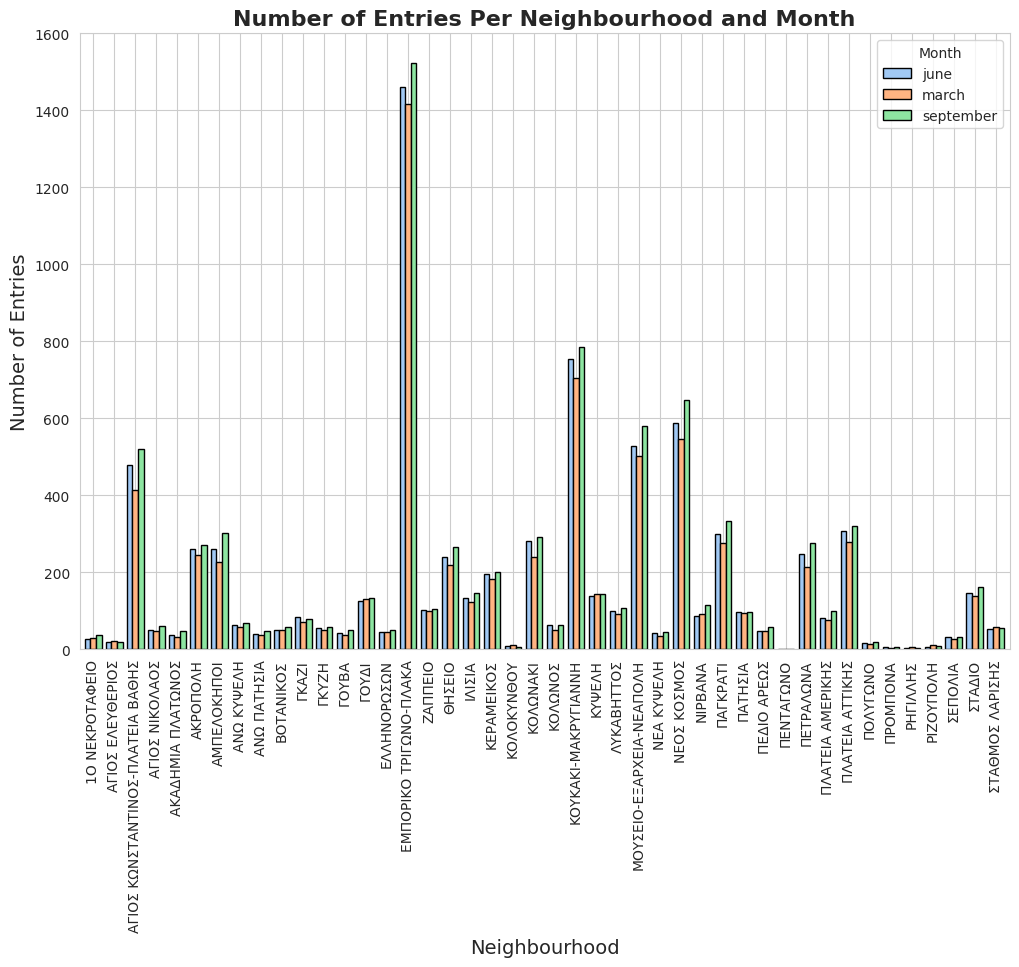

In [182]:
train_2023_copy = train_2023.copy()
neighbourhood_per_month = train_2023_copy.groupby(['neighbourhood', 'month']).size()

# Split Data to have 'month' and 'neighbourhood' as seperate columns
neighbourhood = neighbourhood_per_month.unstack()

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot Bar Chart
neighbourhood.plot(kind='bar', figsize=(12, 8), width=0.8, edgecolor='black')

# Title and Labels
plt.title("Number of Entries Per Neighbourhood and Month", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Number of Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.legend(title="Month")
plt.show()

Ερώτημα 1.7

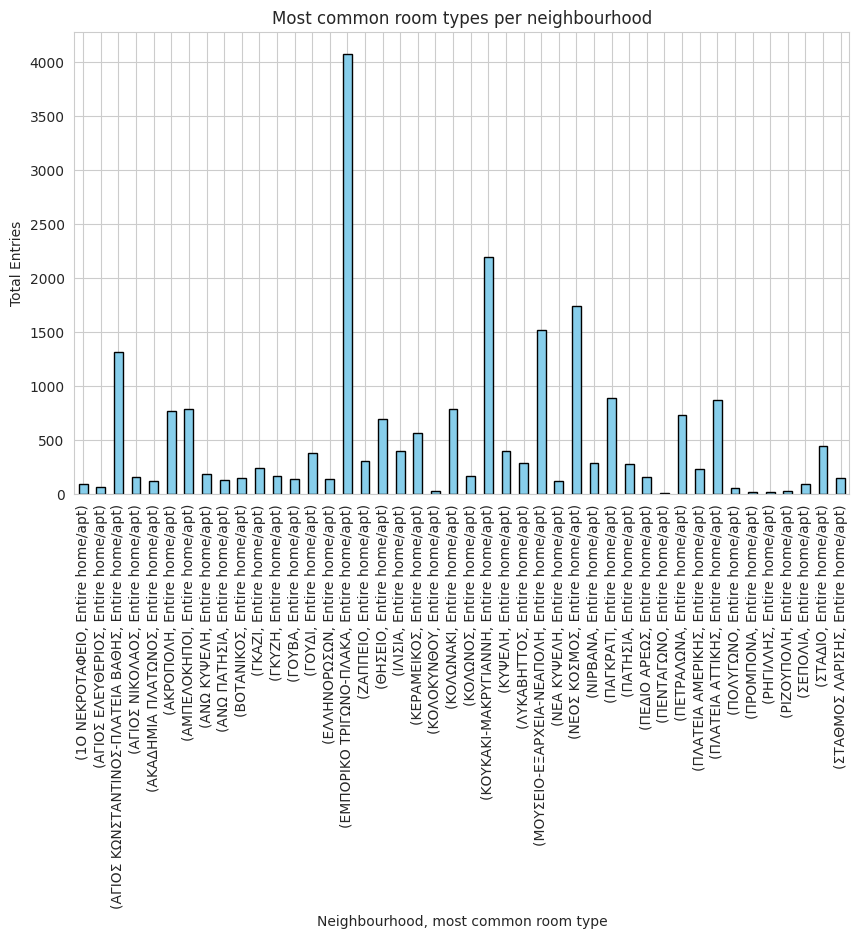

In [183]:
train_2023_copy = train_2023.copy()

most_common_room_types = train_2023_copy.groupby(['neighbourhood', 'room_type']).size()

# Find the index of the maximum value (most_common_room_types) for each neighborhood
most_common_index = most_common_room_types.groupby(level=0).idxmax()

# Select the rows corresponding to the most common room type for each neighborhood
most_common_room_type = most_common_room_types.loc[most_common_index]

# Plot the top 5 neighborhoods with the most entries
most_common_room_type.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Most common room types per neighbourhood')
plt.xlabel('Neighbourhood, most common room type')
plt.ylabel('Total Entries')

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.8

Hotel room


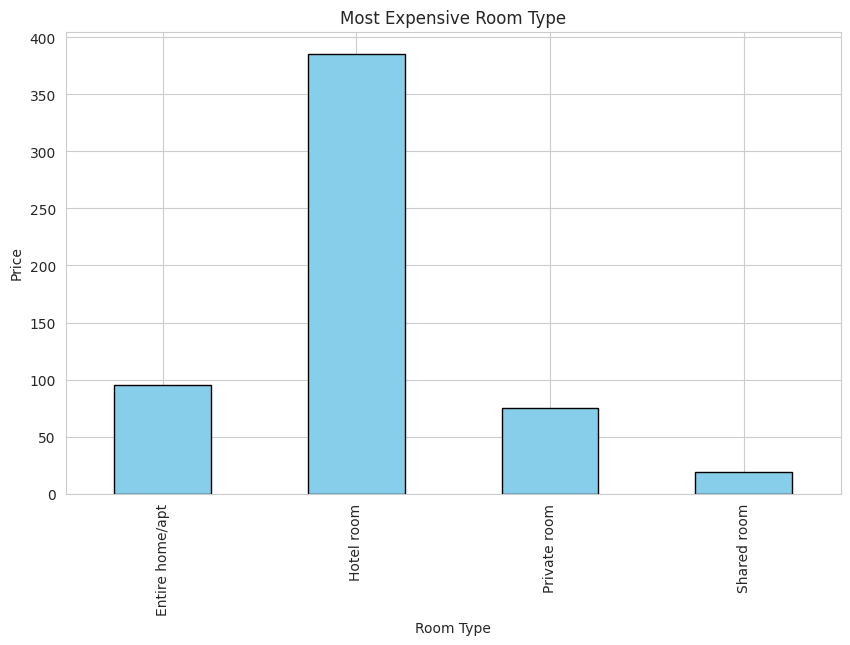

In [184]:
train_2023_copy = train_2023.copy()

# Average Price per Room
average_price_per_room_type = train_2023_copy.groupby('room_type')['price'].mean()

# Most Expensive Room Type
most_expensive_room_type = average_price_per_room_type.idxmax()

print(most_expensive_room_type)

# Plot the top 5 neighborhoods with the most entries
average_price_per_room_type.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Most Expensive Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

# Show the plot
plt.grid(True)
plt.show()

Ερώτημα 1.9

In [185]:
# Month to use
target_month = 'march'
march_listings = train_2023[train_2023['month'] == target_month].head(30)

# Create Folium Map
athens_center = [37.9838, 23.7275]  # Coordinates for Athens
m = fol.Map(location=athens_center, zoom_start=12)

# Add markers for each listing
for index, row in march_listings.iterrows():
    # Check if host is verified
    host_verification = '✓' if row['host_identity_verified'] == 'True' else '✗'

    formatted_amenities = re.sub(r'[\[\]]', '', row['amenities'])

    popup_html = f"""
    <b>Host Identity Verified:</b> {host_verification}<br>
    <b>Bedrooms:</b> {row['bedrooms']}<br>
    <b>Beds:</b> {row['beds']}<br>
    <b>Host Response Rate:</b> {row['host_response_rate']}<br>
    <b>Number of Reviews:</b> {row['number_of_reviews']}<br>
    <b>Review Scores Rating:</b> {row['review_scores_rating']}<br>
    <b>Accommodates:</b> {row['accommodates']}<br>
    <b>Amenities:</b> {formatted_amenities}<br>
    <b>Room Type:</b> {row['room_type']}<br>
    <b>Price:</b> {row['price']}<br>
    """
    fol.Marker([row['latitude'], row['longitude']], popup=fol.Popup(popup_html, max_width=300)).add_to(m)

# Display the map
m.save('/content/gdrive/My Drive/Data_Mining_CSV/2023/march_2023_listings_map.html')
m

Ερώτημα 1.10

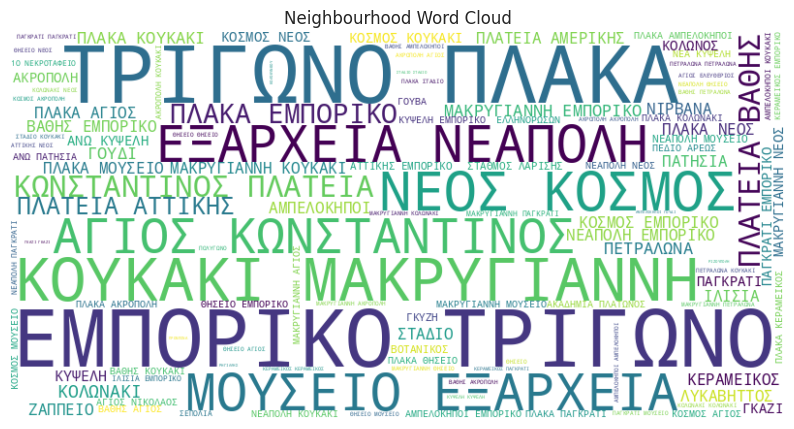

In [186]:
train_2023_copy = train_2023.copy()

# Concatenate all non-NaN entries into a single string for neighbourhood
neighbourhood_text = ' '.join(train_2023_copy['neighbourhood'].dropna())

# Generate word cloud for neighbourhood
neighbourhood_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neighbourhood_text)

# Plot word cloud for neighbourhood
plt.figure(figsize=(10, 6))
plt.imshow(neighbourhood_wordcloud, interpolation='bilinear')
plt.title('Neighbourhood Word Cloud')
plt.axis('off')
plt.show()

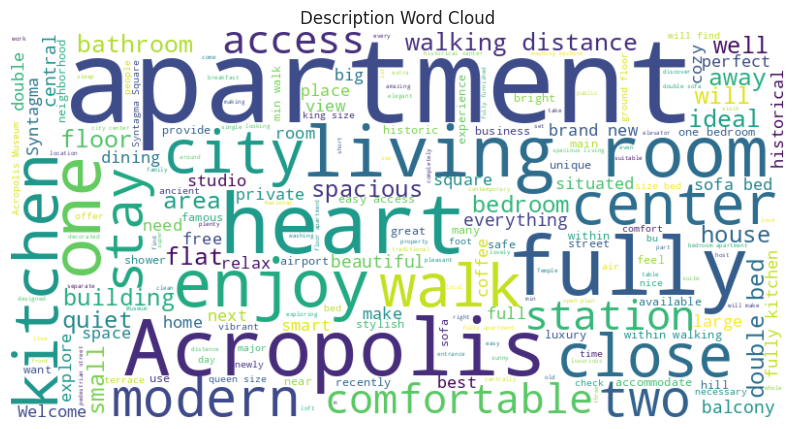

In [187]:
train_2023_copy = train_2023.copy()

# Get set of English words
english_words = set(words.words())

# Clean description text
description_text = ' '.join(train_2023_copy['description'].dropna())
cleaned_words = ' '.join(word for word in description_text.split() if word.lower() in english_words)

# Generate word cloud for cleaned description
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_words)

# Plot word cloud for description
plt.figure(figsize=(10, 6))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')
plt.show()

Ερώτημα 1.11


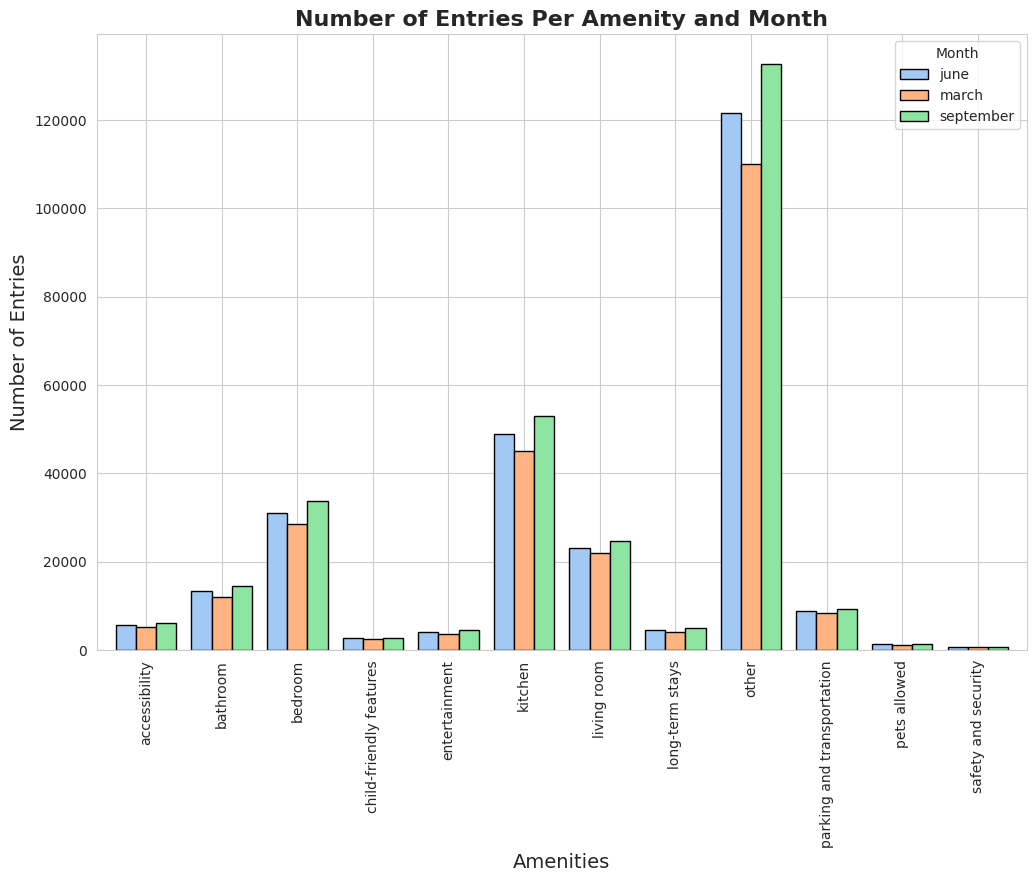

In [188]:
# Mapping
mapping = {
    "kitchen": ["Coffee maker", "Refrigerator", "Oven", "Microwave", "Electric stove", "Toaster", "Stove", "Dishwasher", "Cooking basics", "Hot water kettle", "Baking sheet", "Dishes and silverware", "Wine glasses", "BBQ grill", "Outdoor dining area"],
    "entertainment": ["HDTV", "TV", "Pioneer sound system with aux", "Exercise equipment: free weights, yoga mat", "Bikes", "Children’s books and toys", "Fast wifi – 64 Mbps", "HDTV with standard cable", "43\" HDTV with Netflix", "HDTV with Chromecast", "60\" HDTV with DVD player", "55\" HDTV with standard cable, Chromecast, Netflix", "40\" HDTV with standard cable", "42\" HDTV"],
    "bedroom": ["Bed linens", "Extra pillows and blankets", "Hair dryer", "Iron", "AC - split type ductless system", "Ceiling fan", "Room-darkening shades", "Clothing storage: closet and dresser", "Bathtub", "Window AC unit"],
    "bathroom": ["Shower gel", "Shampoo", "Body soap", "Hair dryer", "Bathtub"],
    "living room": ["Wifi", "Essentials", "Wifi", "Room-darkening shades", "Smoke alarm", "Carbon monoxide alarm", "Fire extinguisher"],
    "parking and transportation": ["Free parking on premises", "Free street parking", "Luggage dropoff allowed", "Paid parking off premises", "Paid parking lot off premises", "Paid parking garage off premises"],
    "safety and security": ["Smoke alarm", "Carbon monoxide alarm", "Fire extinguisher", "Safe"],
    "child-friendly features": ["High chair", "Pack 'n play/Travel crib", "Crib", "Children’s dinnerware", "Toys"],
    "accessibility": ["Elevator", "Wheelchair accessible", "Single level home"],
    "pets allowed": ["Pets allowed"],
    "long-term stays": ["Long term stays allowed"]
}


train_2023_copy = train_2023.copy()

# Cleaning
train_2023_copy['amenities'] = train_2023_copy['amenities'].str.strip('[]').str.replace("\"", "").str.split(',')

# Change each amenity to its corresponding category from mapping
train_2023_copy['amenities'] = train_2023_copy['amenities'].apply(lambda x: [next((category for category, items in mapping.items() if amenity.strip() in items), "other") for amenity in x])

train_2023_copy = train_2023_copy.explode('amenities')
train_2023_copy = train_2023_copy.dropna(subset=['amenities'])
amenities_per_month = train_2023_copy.groupby(['amenities', 'month']).size()
per_month = amenities_per_month.unstack()

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot Histogram
per_month.plot(kind='bar', figsize=(12, 8), width=0.8, edgecolor='black')

# Title and Labels
plt.title("Number of Entries Per Amenity and Month", fontsize=16, fontweight='bold')
plt.xlabel("Amenities", fontsize=14)
plt.ylabel("Number of Entries", fontsize=14)

# Show the plot
plt.grid(True)
plt.legend(title="Month")
plt.show()


Ερώτημα 1.12


<Figure size 1000x600 with 0 Axes>

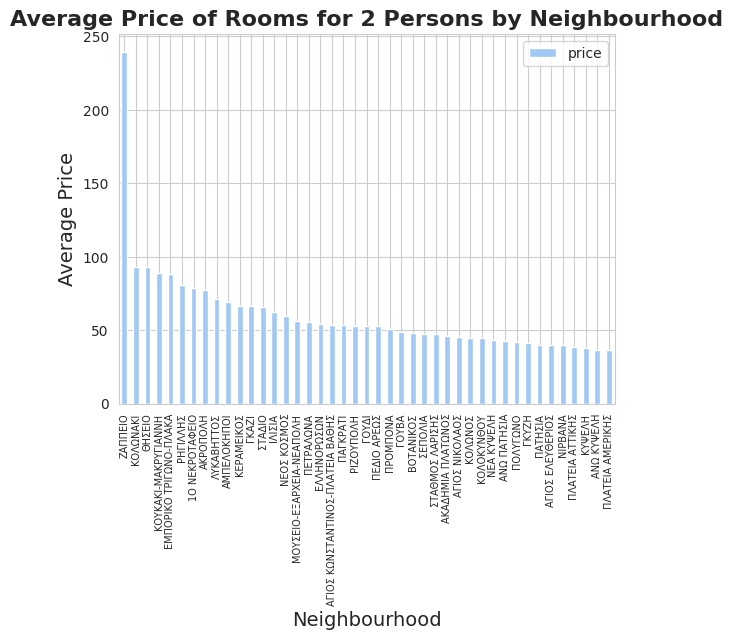

In [189]:
train_2023_copy = train_2023.copy()

# keep rooms that accommodate are for 2 persons
train_2023_copy_filtered = train_2023_copy[train_2023_copy['accommodates'] == 2]

# calculate the average price per neighborhood
avg_price_neighborhood = train_2023_copy_filtered.groupby('neighbourhood')['price'].mean().reset_index()

# sort the neighborhoods based on their average price
top_neighbourhoods = avg_price_neighborhood.sort_values(by = 'price', ascending=False)

# Set the 'neighbourhood' column as the index
top_neighbourhoods.set_index('neighbourhood', inplace=True)

# Plot the neighborhoods on a graph
plt.figure(figsize=(10,6))
top_neighbourhoods.plot(kind='bar')

# Title and Labels
plt.xticks(rotation=90, fontsize=7)
plt.title("Average Price of Rooms for 2 Persons by Neighbourhood", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Average Price", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

In [190]:
avg_price = top_neighbourhoods['price']
expensive_threshold = avg_price.quantile(0.7)
budget_threshold = avg_price.quantile(0.3)

# Create a new column to store the price category (Initialize with Moderate)
top_neighbourhoods['price_category'] = 'Moderate'

# Classify neighborhoods based on average price
top_neighbourhoods.loc[top_neighbourhoods['price'] >= expensive_threshold, 'price_category'] = 'Very Expensive'
top_neighbourhoods.loc[top_neighbourhoods['price'] <= budget_threshold, 'price_category'] = 'Economical'

print(top_neighbourhoods)

                                       price  price_category
neighbourhood                                               
ΖΑΠΠΕΙΟ                           239.659574  Very Expensive
ΚΟΛΩΝΑΚΙ                           92.798587  Very Expensive
ΘΗΣΕΙΟ                             92.688679  Very Expensive
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                88.681725  Very Expensive
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             87.943159  Very Expensive
ΡΗΓΙΛΛΗΣ                           81.000000  Very Expensive
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                     78.411765  Very Expensive
ΑΚΡΟΠΟΛΗ                           77.435484  Very Expensive
ΛΥΚΑΒΗΤΤΟΣ                         70.890244  Very Expensive
ΑΜΠΕΛΟΚΗΠΟΙ                        69.133047  Very Expensive
ΚΕΡΑΜΕΙΚΟΣ                         66.776316  Very Expensive
ΓΚΑΖΙ                              66.384615  Very Expensive
ΣΤΑΔΙΟ                             65.529412  Very Expensive
ΙΛΙΣΙΑ                             62.031250        Moderate
ΝΕΟΣ ΚΟΣΜΟΣ             

Ερώτημα 1.13

Α. Τα 5 διαμερίσματα ποιό κοντά στην Πλατεία Συντάγματος

In [191]:
syntagma_square_coords = (37.9755, 23.7346)

train_2023_copy = train_2023.copy()

# Remove duplicate locations
train_2023_copy.drop_duplicates(subset=['latitude'], keep='first', inplace=True)
train_2023_copy.drop_duplicates(subset=['longitude'], keep='first', inplace=True)

# Calculate distance to Syntagma Square for each listing
train_2023_copy['distance_to_syntagma_square'] = train_2023_copy.apply(lambda row: geodesic((row['latitude'], row['longitude']), syntagma_square_coords).kilometers, axis=1)

# Select the top 5 closest listings to Syntagma Square
top_5_closest_listings = train_2023_copy.nsmallest(5, 'distance_to_syntagma_square')

# Create a map
map_syntagma = fol.Map(location=syntagma_square_coords, zoom_start=15)
fol.Marker(location=syntagma_square_coords, popup='Syntagma Square', icon=fol.Icon(color='red')).add_to(map_syntagma)

# Add markers for the top 5 closest listings
for idx, row in top_5_closest_listings.iterrows():
    fol.Marker(location=(row['latitude'], row['longitude']), popup=row['name']).add_to(map_syntagma)

map_syntagma

Β. Ποιες είναι οι 5 γειτόνιες με το καλύτερο μέσο όρο στη βαθμολογία κρητικών

neighbourhood
ΠΟΛΥΓΩΝΟ             4.864400
ΖΑΠΠΕΙΟ              4.839967
ΕΛΛΗΝΟΡΩΣΩΝ          4.823830
ΡΗΓΙΛΛΗΣ             4.812308
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ    4.811453
Name: review_scores_rating, dtype: float64


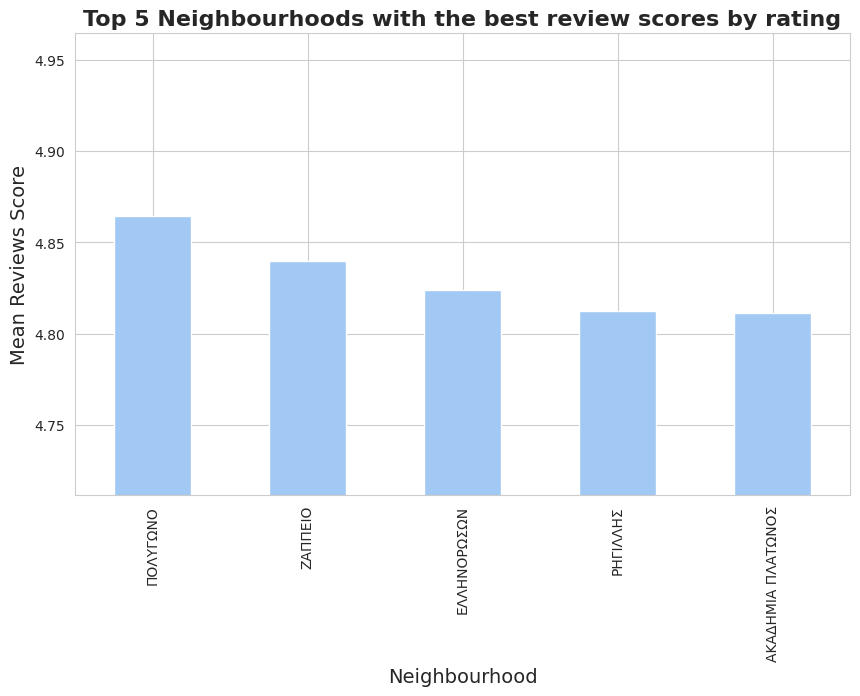

In [192]:
train_2023_copy = train_2023.copy()

neighbourhood_by_score = train_2023_copy.groupby('neighbourhood')['review_scores_rating'].mean()

neighbourhood_by_score = neighbourhood_by_score.sort_values(ascending=False)

top_5_neighbourhood_by_score = neighbourhood_by_score.head(5)

print(top_5_neighbourhood_by_score)

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the neighborhoods on a graph
top_5_neighbourhood_by_score.plot(kind='bar', figsize=(10, 6))

# Title and Labels
plt.xticks(rotation=90)
plt.title("Top 5 Neighbourhoods with the best review scores by rating", fontsize=16, fontweight='bold')
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Mean Reviews Score", fontsize=14)

# Show the different values more clearly
plt.ylim(top_5_neighbourhood_by_score.min() - 0.1, top_5_neighbourhood_by_score.max() + 0.1)

# Show the plot
plt.grid(True)
plt.show()

Γ. Ποιος είναι ο πιο συχνός τύπος ιδιοκτησίας (property_type) ανα γειτονιά

In [193]:
train_2023_copy = train_2023.copy()

# Grouping by neighbourhood and property_type, and counting occurrences
property_type_counts = train_2023_copy.groupby(['neighbourhood', 'property_type']).size().reset_index(name='counts')

# Finding the index of the maximum count for each neighbourhood
max_counts_index = property_type_counts.groupby('neighbourhood')['counts'].idxmax()

# Getting the property_type with the maximum count for each neighbourhood
most_used_property_types = property_type_counts.loc[max_counts_index]

most_used_property_types[['neighbourhood', 'property_type']]

,neighbourhood,property_type
3,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire rental unit
7,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire rental unit
14,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire rental unit
28,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,Entire rental unit
36,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,Entire rental unit
42,ΑΚΡΟΠΟΛΗ,Entire rental unit
60,ΑΜΠΕΛΟΚΗΠΟΙ,Entire rental unit
69,ΑΝΩ ΚΥΨΕΛΗ,Entire rental unit
76,ΑΝΩ ΠΑΤΗΣΙΑ,Entire rental unit
81,ΒΟΤΑΝΙΚΟΣ,Entire rental unit


Ερώτημα 1.14

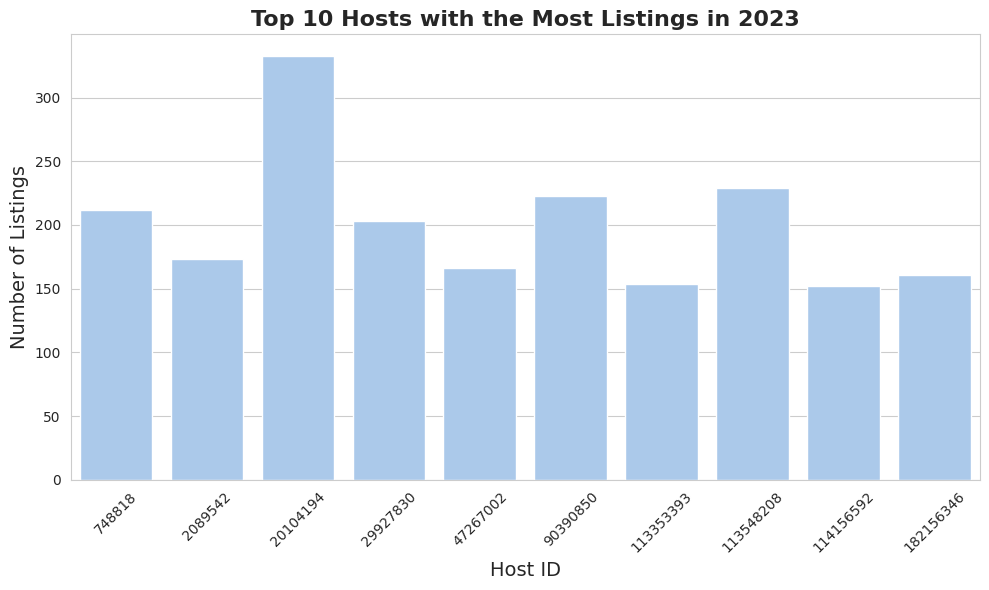

In [194]:

# Read June CSV
filePath_june = filePath + 'june/'
june_listings_2023 = pd.read_csv(filePath_june + 'listings.csv', thousands=',')
june_listings_2023 = june_listings_2023[['host_id']]

# Read March CSV
filePath_march = filePath + 'march/'
march_listings_2023 = pd.read_csv(filePath_march + 'listings.csv', thousands=',')
march_listings_2023 = march_listings_2023[['host_id']]

# Read September CSV
filePath_september = filePath + 'september/'
september_listings_2023 = pd.read_csv(filePath_september + 'listings.csv', thousands=',')
september_listings_2023 = september_listings_2023[['host_id']]

dfs = [june_listings_2023, march_listings_2023, september_listings_2023]

# Combine June, March and September into one Dataframe
final_df_2023 = pd.concat(dfs, ignore_index=True)

# Reset Index
final_df_2023 = final_df_2023.reset_index(drop=True)

# Group by host_id and count the number of listings for each host
host_listings_count = final_df_2023.groupby('host_id').size().reset_index(name='num_host_listings')

# Sort the hosts by the number of listings in descending order
top_hosts = host_listings_count.sort_values(by='num_host_listings', ascending=False).head(10)

# Plot Styling
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the neighborhoods on a graph
plt.figure(figsize=(10, 6))  # Create a new figure explicitly
sns.barplot(x='host_id', y='num_host_listings', data=top_hosts)

# Title and Labels
plt.xticks(rotation=45)
plt.title("Top 10 Hosts with the Most Listings in 2023", fontsize=16, fontweight='bold')
plt.xlabel("Host ID", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Ερώτημα 1.15

**Ερώτημα 1.15**

**Σύκριση δεδομένων μεταξύ των ετών 2019 και 2023.**

Όσο αναφορά τον τύπο δωματιών παρατηρούμε πως και στις δύο χρονιές η κατηγορία "Entire home/apt" είναι η πιο συχνή. Στα δεδομένα του 2023 υπάρχει μία έξτρα κατηγορία η "Hotel room", η οποία δεν υπάρχει το έτος 2019.

Οι τιμές το έτος 2023 παρουσιάζουν σημαντική αύξηση σε σχέση με το 2019 μέχρι και πάνω από διπλάσια τιμή.

Οι τρεις πρώτες γειτονιές με τα περισσότερα reviews είναι ίδιες και στα δύο έτη. Διαφοροποίηση παρατειρείται στη 4η και 5η θέση.

Οι τρεις πρώτες γειτονιές με τις πιο πολλές εισαγωγές τόσο ανα μήνα όσο και συνολικά παραμένουν ίδιες και στα δύο έτη. Η τρίτη και τέταρτη θέση έχουν αλλάξει μεταξύ αυτών των ετών. Πιθανόν μέχρι το 2023 να υπάρχει ανάπτυξη στην περιοχή των Εξαρχείων και της Πλατείας Βάθης με τη εισαγωγή πολλών δωματίων ξεπερνώντας τις περιοχές του 2019 Παγκράτι και Αμπελόκηποι.

Το 2023 η κατηγορία "Hotel Room" λαμβάνει την πρώτη θέση όσο αναφορά τον πιο ακριβό τύπο δωματίου σε αντίθεση με το 2019 που ο πιο ακριβός τύπος ήταν το "Entire home/apt".

Όσο αναφορά τους τύπους ιδιοκτησίας και στις δύο χρονιές ο πιο συχνός είναι το "Αpartment" ή "Entire rental unit".

Σχετικά με τα δωμάτια που επιτρέπουν φιλοξενία δύο ατόμων παρατειρείται ανά γειτονιά μεγάλη αύξηση ως προς την τιμή το έτος 2023 σε σχέση με το 2019.

**Μέρος 2**

Open train_2023.csv

In [195]:
train_2023 = pd.read_csv(filePath + 'train_2023.csv')

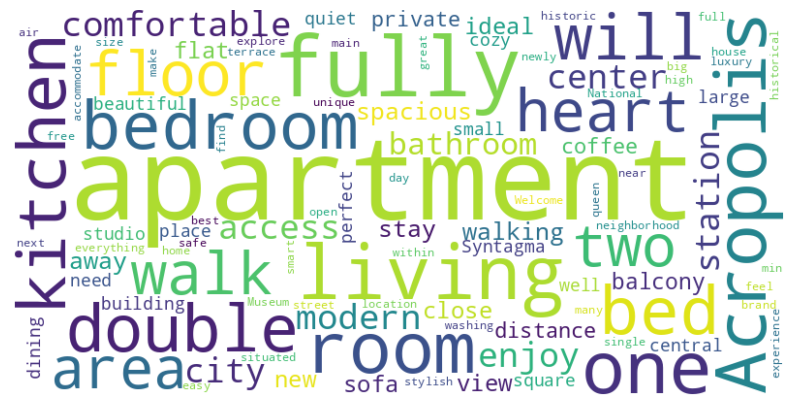

,id,name,description,name_description
0,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Quality Deluxe apartment is apartment square t...,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...
1,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,is apartment on the to clean all the that you ...,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...
2,695173,Condo in Athens · ★4.88 · 2 bedrooms · 3 beds ...,My unique artistic comfortable two bedroom apa...,Condo in Athens · ★4.88 · 2 bedrooms · 3 beds ...
3,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,Quality Ground floor apartment with is apartme...,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...
4,28186,Loft in Athens · ★4.82 · 1 bedroom · 2 beds · ...,TOP to stay waste your precious time in the mo...,Loft in Athens · ★4.82 · 1 bedroom · 2 beds · ...
5,699974,Rental unit in Athens · ★4.63 · 2 bedrooms · 1...,A nice comfortable space of two with a small l...,Rental unit in Athens · ★4.63 · 2 bedrooms · 1...
6,33945,Rental unit in Athens · ★4.69 · 2 bedrooms · 2...,Apartment near Safe All included in the all ar...,Rental unit in Athens · ★4.69 · 2 bedrooms · 2...
7,702480,Rental unit in Athens · ★4.90 · 1 bedroom · 2 ...,Eat breakfast al fresco at the balcony of this...,Rental unit in Athens · ★4.90 · 1 bedroom · 2 ...
8,49489,Rental unit in Athens · ★4.68 · 3 bedrooms · 5...,Fully apartment on downtown Ideal for or of vi...,Rental unit in Athens · ★4.68 · 3 bedrooms · 5...
9,709960,Condo in Athens · ★4.74 · 3 bedrooms · 2 beds ...,under the in one of the most quiet and of the ...,Condo in Athens · ★4.74 · 3 bedrooms · 2 beds ...


In [196]:
train_2023_copy = train_2023.copy()

# Remove non english words from the description column
english_words = set(words.words())
train_2023_copy['description'] = train_2023_copy['description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() in english_words]))

# Generate word cloud for cleaned description column and remove stopwords
wordcloud_params = {
    'width': 800,
    'height': 400,
    'background_color': 'white',
    'max_words': 100,
    'stopwords': STOPWORDS,
    'collocations': False
}
description_wordcloud = WordCloud(**wordcloud_params).generate(' '.join(train_2023_copy['description']))

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Concatenate 'name' and 'description' columns
train_2023_part_2 = train_2023_copy[['id', 'name', 'description']].copy()
train_2023_part_2 = train_2023_part_2.drop_duplicates(subset = 'id')
train_2023_part_2['name_description'] = train_2023_part_2['name'].fillna('') + ' ' + train_2023_part_2['description'].fillna('')
train_2023_part_2 = train_2023_part_2.reset_index(drop = True)
train_2023_part_2.head(10)

1. TF-IDF (Term Frequency - Inverse Document Frequency)

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidVectorizer for Unigrams and Bigrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=1.0, min_df=1, max_features=10000, ngram_range=(1, 2))

# Fix and Transform the Data
tfidf_matrix = tfidf_vectorizer.fit_transform(train_2023_part_2['name_description'])

# Print Current TF-IDF Shape
print("TF-IDF Shape: ", tfidf_matrix.shape)

TF-IDF Shape:  (9866, 10000)


2. Cosine Similarity

In [198]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Flatten the upper triangular part of the cosine similarity matrix
upper_triangular = np.triu(cosine_sim, k=1)
flatten_sim_scores = upper_triangular.flatten()

# Get indices of top 100 highest similarity scores
top_100_indices = np.argsort(flatten_sim_scores)[-100:][::-1]

# Initialize a dictionary to store the 100 most similar properties
most_similar_pairs = {}

# Iterate through the top 100 indices and retrieve the corresponding property pairs
for index in top_100_indices:
    # Calculate the row and column indices from the flattened index
    row_index, col_index = np.unravel_index(index, cosine_sim.shape)

    # Get the similarity score
    similarity_score = cosine_sim[row_index, col_index]

    # Store the property pair and similarity score in the dictionary
    property_pair = (train_2023_part_2.iloc[row_index]['id'], train_2023_part_2.iloc[col_index]['id'])
    most_similar_pairs[property_pair] = similarity_score

# Print the 100 most similar property pairs
for rank, (property_pair, similarity_score) in enumerate(most_similar_pairs.items(), start=1):
    print(f"Rank {rank}: Properties {property_pair}, Similarity Score: {similarity_score}")

Rank 1: Properties (14818761, 14819993), Similarity Score: 1.0000000000000007
Rank 2: Properties (939739419274982822, 939741983591168954), Similarity Score: 1.0000000000000007
Rank 3: Properties (903432668297432983, 866301094035717759), Similarity Score: 1.0000000000000004
Rank 4: Properties (49696244, 648315386699266172), Similarity Score: 1.0000000000000004
Rank 5: Properties (625962696455563695, 902154033838435542), Similarity Score: 1.0000000000000004
Rank 6: Properties (39108831, 759999668192960967), Similarity Score: 1.0000000000000004
Rank 7: Properties (609878765979522737, 776657169303578749), Similarity Score: 1.0000000000000004
Rank 8: Properties (701322917586903482, 768517970936329558), Similarity Score: 1.0000000000000004
Rank 9: Properties (678997895466649910, 714107233353295134), Similarity Score: 1.0000000000000004
Rank 10: Properties (636187966959648696, 670902665227942232), Similarity Score: 1.0000000000000004
Rank 11: Properties (39108831, 761543714970665551), Similar

3. Πρόβλεψη

In [199]:
def recommend(id, num):
    idx = train_2023_copy[train_2023_copy['id'] == id].index[0] if len(train_2023_copy[train_2023_copy['id'] == id]) > 0 else 0
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num+1]
    recommended_properties = []
    for i, score in sim_scores:
        recommended_properties.append((train_2023_copy.iloc[i]['name'], train_2023_copy.iloc[i]['description'], score))
    print(f'Recommending {num} listings similar to {train_2023_copy.iloc[idx]["name"]}')
    print('-' * 50)
    for name, desc, score in recommended_properties:
        print(f'Recommended: {name}')
        print(f'Description: {desc}')
        print(f'(score: {score})')
        print('-' * 50)

# Example
recommend(10988, 5)

Recommending 5 listings similar to Rental unit in Athens · ★4.80 · 1 bedroom · 1 bed · 1 bath
--------------------------------------------------
Recommended: Rental unit in Athens · ★4.80 · 1 bedroom · 2 beds · 1 bath
Description: is apartment on the to clean all the that you will nice excellent fully air Fiber connection fully kitchen and is an excellent close to very clean apartment square on the floor is with all the that you will need and a very nice balcony facing the inner garden to enjoy your breakfast in the morning or relax in the Fully kitchen with everything you need to prepare your Nice Living room to relax and enjoy a movie or a sport Clean nice In case you are more than people there is a in the living studio everything you will line for incoming or to call
(score: 0.8196649825263007)
--------------------------------------------------
Recommended: Rental unit in Athens · ★4.81 · 1 bedroom · 1 bed · 1 bath
Description: Quality Ground floor apartment with is apartment square

4. **Λέξεις που εμφανίζονται συχνά μαζί με άλλες λέξεις**

In [200]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Tokenize the text into words
tokens = ' '.join(train_2023_part_2['name_description']).split()

# Filter out stop words and punctuation
english_words = set(words.words())
filtered_tokens = [token for token in tokens if token.lower() not in STOPWORDS and token.lower() in english_words and token.isalnum()]

# Use BigramCollocationFinder to find collocations
finder = BigramCollocationFinder.from_words(filtered_tokens)

# Apply frequency filter to get collocations that appear at least twice
finder.apply_freq_filter(2)

# Get the top 10 collocations
collocations = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)

print('10 Frequently Occurring Collocations:')
for collocation in collocations:
    print(collocation)

10 Frequently Occurring Collocations:
('Rental', 'unit')
('unit', 'bedroom')
('bedroom', 'bed')
('living', 'room')
('bed', 'bath')
('walking', 'distance')
('bedroom', 'bath')
('brand', 'new')
('within', 'walking')
('double', 'bed')
